In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz


# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestRegressor

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')


from scipy.stats import shapiro

# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score

In [2]:
df_test_x=pd.read_csv("C:/Users/최강현/Downloads/scale_test_x.csv")
df_test_y=pd.read_csv("C:/Users/최강현/Downloads/scale_test_y.csv")
df_train_x=pd.read_csv("C:/Users/최강현/Downloads/scale_train_x.csv")
df_train_y=pd.read_csv("C:/Users/최강현/Downloads/scale_train_y.csv")

In [3]:
df_test_x.drop(["Unnamed: 0"],axis=1,inplace=True)
df_test_y.drop(["Unnamed: 0"],axis=1,inplace=True)
df_train_x.drop(["Unnamed: 0"],axis=1,inplace=True)
df_train_y.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
df_train_x.drop('rolling_temp',axis=1,inplace=True)
df_test_x.drop('rolling_temp',axis=1,inplace=True)

In [5]:
df_test_x

,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,3300,53,6,14,43,4,1,0,0,0,0,0,0,1,1,1,1,0,1,1
1,2500,60,4,14,28,2,2,0,0,0,0,0,0,0,1,1,1,0,0,1
2,2500,128,7,4,3,5,0,1,0,1,0,0,0,0,1,0,0,0,1,1
3,3400,68,5,18,1,3,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,2900,60,6,15,30,4,1,0,0,0,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,3600,55,6,3,52,4,0,0,0,1,0,0,0,1,1,1,1,0,1,1
295,2500,82,6,20,16,4,2,1,1,1,0,0,0,1,1,1,1,0,1,1
296,3100,48,3,7,52,1,2,1,1,0,0,0,1,1,0,0,0,0,1,1
297,2500,86,3,20,11,1,2,1,0,1,0,0,0,0,0,0,0,0,1,1


In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 스케일링에서 제외할 변수들
exclude_cols = ["weekday_number", "pt_length_cluster"]

# 연속형 변수 선택 (object 제외)
num_cols_train = df_train_x.select_dtypes(exclude="object").columns
num_cols_test = df_test_x.select_dtypes(exclude="object").columns

# 0/1 더미 변수 제외하고, 특정 변수 제외
num_cols_train = [col for col in num_cols_train if df_train_x[col].nunique() > 2 and col not in exclude_cols]
num_cols_test = [col for col in num_cols_test if df_test_x[col].nunique() > 2 and col not in exclude_cols]

# 스케일링
scaler = StandardScaler()
scaled_num_train = pd.DataFrame(scaler.fit_transform(df_train_x[num_cols_train]), columns=num_cols_train)
scaled_num_test = pd.DataFrame(scaler.transform(df_test_x[num_cols_test]), columns=num_cols_test)

# 스케일링 제외 변수들 (weekday_number, pt_length_cluster 포함)
df_others_train = df_train_x.drop(columns=num_cols_train)
df_others_test = df_test_x.drop(columns=num_cols_test)

# 합치기
train_x_scaled = pd.concat([scaled_num_train.reset_index(drop=True), df_others_train.reset_index(drop=True)], axis=1)
test_x_scaled = pd.concat([scaled_num_test.reset_index(drop=True), df_others_test.reset_index(drop=True)], axis=1)

# 확인
print("Scale 변환_train:")
display(train_x_scaled.head())

print("Scale 변환_test:")
display(test_x_scaled)


Scale 변환_train:


,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,-0.053741,0.460068,-1.120807,0.246352,0.983705,2,1,0,0,0,0,0,0,1,1,1,1,0,0,1
1,-0.261243,-0.719462,-0.630586,-0.041162,-1.492310,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.568764,-0.530738,-0.140365,0.677623,0.806846,4,1,0,0,0,0,0,0,0,1,1,1,1,1,1
3,0.153760,-0.672281,1.820518,-1.622488,0.924752,1,1,0,0,0,0,1,0,1,1,1,1,0,1,0
4,0.568764,0.743155,-0.140365,1.396407,1.337421,4,2,1,1,1,0,0,1,1,1,0,0,0,1,1


Scale 변환_test:


,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,0.983768,-0.908187,-0.140365,0.390109,0.806846,4,1,0,0,0,0,0,0,1,1,1,1,0,1,1
1,-0.676247,-0.577919,-1.120807,0.390109,-0.077444,2,2,0,0,0,0,0,0,0,1,1,1,0,0,1
2,-0.676247,2.630403,0.349855,-1.047461,-1.551262,5,0,1,0,1,0,0,0,0,1,0,0,0,1,1
3,1.191270,-0.200469,-0.630586,0.965137,-1.669168,3,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,0.153760,-0.577919,-0.140365,0.533866,0.040461,4,1,0,0,0,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.606274,-0.813825,-0.140365,-1.191218,1.337421,4,0,0,0,1,0,0,0,1,1,1,1,0,1,1
295,-0.676247,0.460068,-0.140365,1.252650,-0.784877,4,2,1,1,1,0,0,0,1,1,1,1,0,1,1
296,0.568764,-1.144093,-1.611028,-0.616190,1.337421,1,2,1,1,0,0,0,1,1,0,0,0,0,1,1
297,-0.676247,0.648793,-1.611028,1.252650,-1.079641,1,2,1,0,1,0,0,0,0,0,0,0,0,1,1


In [7]:
train_x_scaled

,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,-0.053741,0.460068,-1.120807,0.246352,0.983705,2,1,0,0,0,0,0,0,1,1,1,1,0,0,1
1,-0.261243,-0.719462,-0.630586,-0.041162,-1.492310,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.568764,-0.530738,-0.140365,0.677623,0.806846,4,1,0,0,0,0,0,0,0,1,1,1,1,1,1
3,0.153760,-0.672281,1.820518,-1.622488,0.924752,1,1,0,0,0,0,1,0,1,1,1,1,0,1,0
4,0.568764,0.743155,-0.140365,1.396407,1.337421,4,2,1,1,1,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0.568764,0.412886,-1.611028,0.533866,0.747894,1,2,1,1,0,0,0,1,1,0,0,0,0,1,1
691,-1.298753,-0.342013,0.840076,1.683921,0.688941,6,0,0,0,0,0,1,0,0,1,1,1,0,1,1
692,-1.091251,0.224162,0.349855,-0.328676,1.160563,5,2,1,0,0,1,0,0,0,0,0,0,0,1,1
693,-1.298753,1.120605,-1.120807,1.683921,0.453130,2,0,0,0,1,0,0,1,0,1,1,1,0,0,1


In [8]:
# 열 맞춰서 정확히 합치기
df_train = pd.concat([df_train_y, train_x_scaled], axis=1)
df_train

,scale,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),...,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,1,-0.053741,0.460068,-1.120807,0.246352,0.983705,2,1,0,0,...,0,0,0,1,1,1,1,0,0,1
1,0,-0.261243,-0.719462,-0.630586,-0.041162,-1.492310,3,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0.568764,-0.530738,-0.140365,0.677623,0.806846,4,1,0,0,...,0,0,0,0,1,1,1,1,1,1
3,1,0.153760,-0.672281,1.820518,-1.622488,0.924752,1,1,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0.568764,0.743155,-0.140365,1.396407,1.337421,4,2,1,1,...,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,0.568764,0.412886,-1.611028,0.533866,0.747894,1,2,1,1,...,0,0,1,1,0,0,0,0,1,1
691,0,-1.298753,-0.342013,0.840076,1.683921,0.688941,6,0,0,0,...,0,1,0,0,1,1,1,0,1,1
692,0,-1.091251,0.224162,0.349855,-0.328676,1.160563,5,2,1,0,...,1,0,0,0,0,0,0,0,1,1
693,1,-1.298753,1.120605,-1.120807,1.683921,0.453130,2,0,0,0,...,0,0,1,0,1,1,1,0,0,1


In [9]:
# 열 맞춰서 정확히 합치기
df_test = pd.concat([df_test_y, test_x_scaled], axis=1)
df_test

,scale,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),...,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,0,0.983768,-0.908187,-0.140365,0.390109,0.806846,4,1,0,0,...,0,0,0,1,1,1,1,0,1,1
1,1,-0.676247,-0.577919,-1.120807,0.390109,-0.077444,2,2,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,-0.676247,2.630403,0.349855,-1.047461,-1.551262,5,0,1,0,...,0,0,0,0,1,0,0,0,1,1
3,0,1.191270,-0.200469,-0.630586,0.965137,-1.669168,3,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0.153760,-0.577919,-0.140365,0.533866,0.040461,4,1,0,0,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1.606274,-0.813825,-0.140365,-1.191218,1.337421,4,0,0,0,...,0,0,0,1,1,1,1,0,1,1
295,0,-0.676247,0.460068,-0.140365,1.252650,-0.784877,4,2,1,1,...,0,0,0,1,1,1,1,0,1,1
296,0,0.568764,-1.144093,-1.611028,-0.616190,1.337421,1,2,1,1,...,0,0,1,1,0,0,0,0,1,1
297,0,-0.676247,0.648793,-1.611028,1.252650,-1.079641,1,2,1,0,...,0,0,0,0,0,0,0,0,1,1


In [35]:
df_train

,scale,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),...,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,1,-0.053741,0.460068,-1.120807,0.246352,0.983705,2,1,0,0,...,0,0,0,1,1,1,1,0,0,1
1,0,-0.261243,-0.719462,-0.630586,-0.041162,-1.492310,3,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0.568764,-0.530738,-0.140365,0.677623,0.806846,4,1,0,0,...,0,0,0,0,1,1,1,1,1,1
3,1,0.153760,-0.672281,1.820518,-1.622488,0.924752,1,1,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0.568764,0.743155,-0.140365,1.396407,1.337421,4,2,1,1,...,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,0.568764,0.412886,-1.611028,0.533866,0.747894,1,2,1,1,...,0,0,1,1,0,0,0,0,1,1
691,0,-1.298753,-0.342013,0.840076,1.683921,0.688941,6,0,0,0,...,0,1,0,0,1,1,1,0,1,1
692,0,-1.091251,0.224162,0.349855,-0.328676,1.160563,5,2,1,0,...,1,0,0,0,0,0,0,0,1,1
693,1,-1.298753,1.120605,-1.120807,1.683921,0.453130,2,0,0,0,...,0,0,1,0,1,1,1,0,0,1


In [33]:
df_train["is_ship_steel_True"]

0      1
1      0
2      0
3      1
4      1
      ..
690    1
691    0
692    0
693    0
694    1
Name: is_ship_steel_True, Length: 695, dtype: int64

In [11]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('scale', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
5,minute,1.02
20,hsb_적용,1.03
18,descaling_parity_odd,1.04
6,weekday_number,1.31
4,hour,1.31
13,is_high_strength_True,1.52
14,is_ship_steel_True,1.63
1,pt_width,1.66
2,fur_soak_time,1.69
10,work_group_2조,1.73


In [12]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""scale ~ pt_width+fur_soak_time+day+hour+minute+weekday_number+pt_length_cluster+steel_kind_T+Q("rolling_method_TMCP(온도제어)")+heat_temp_high_True+work_group_2조+work_group_3조+work_group_4조+is_high_strength_True+is_ship_steel_True+heat_temp_high_True+soak_temp_high_True+both_temp_high_True+descaling_parity_odd+rolling_temp_1000_low+hsb_적용""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.069042
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                           20
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.8888
Time:                        16:21:41   Log-Likelihood:                -47.984
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                1.389e-149
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         65.7980   2.25e+04      0.003      0.998   -4.41e+04    4.42e+04
pt_wi

In [15]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""scale ~ pt_width+fur_soak_time+day+hour+minute+weekday_number+pt_length_cluster+steel_kind_T+Q("rolling_method_TMCP(온도제어)")+heat_temp_high_True+work_group_3조+work_group_4조+is_high_strength_True+is_ship_steel_True+heat_temp_high_True+soak_temp_high_True+both_temp_high_True+descaling_parity_odd+rolling_temp_1000_low+hsb_적용""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.073268
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      675
Method:                           MLE   Df Model:                           19
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.8820
Time:                        16:23:08   Log-Likelihood:                -50.921
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                3.808e-149
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         59.1964   1398.228      0.042      0.966   -2681.280    2799.673
pt_wi

In [17]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""scale ~ weekday_number+pt_length_cluster+soak_temp_high_True+rolling_temp_1000_low""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.338726
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.4544
Time:                        16:23:09   Log-Likelihood:                -235.41
converged:                       True   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 1.357e-83
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.8450      0.644      4.419      0.000       1.583       4.

In [19]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능 
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")

Train 예측 결과 
 0    1
1    0
2    0
3    0
4    0
dtype: int32 

Confusion Matrix: 
[[474   4]
 [ 82 135]] 

Test 예측 결과 
 0    0
1    1
2    0
3    0
4    0
dtype: int32 

Confusion Matrix: 
[[206   0]
 [ 39  54]] 



In [21]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")
print(classification_report(df_train["scale"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.876

Confusion Matrix: 
[[474   4]
 [ 82 135]] 

              precision    recall  f1-score   support

           0      0.853     0.992     0.917       478
           1      0.971     0.622     0.758       217

    accuracy                          0.876       695
   macro avg      0.912     0.807     0.838       695
weighted avg      0.890     0.876     0.867       695

Test 예측/분류 결과
Accuracy: 0.870

Confusion Matrix: 
[[206   0]
 [ 39  54]] 

              precision    recall  f1-score   support

           0      0.841     1.000     0.914       206
           1      1.000     0.581     0.735        93

    accuracy                          0.870       299
   macro avg      0.920     0.790     0.824       299
weighted avg      0.890     0.870     0.858       299



<Axes: >

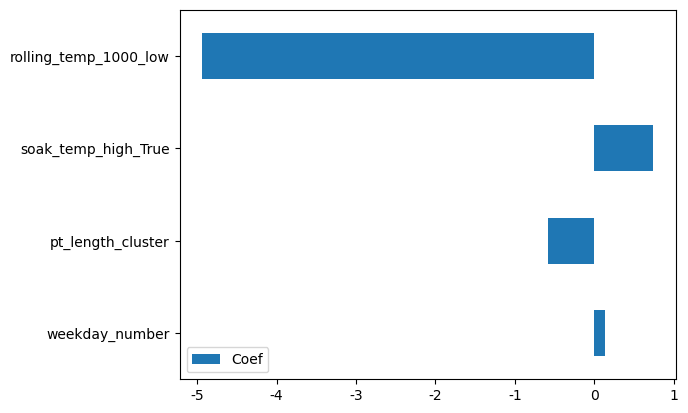

In [23]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 셀 내부 모든 출력결과를 보여주기(생략하지 않음)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# ▶️ 최적 파라미터 (GridSearch 결과 기반)
best_params = {
    'hidden_layer_sizes': (64, 64, 32),
    'activation': 'relu',
    'alpha': 0.001,
    'learning_rate_init': 0.01,
    'solver': 'adam',
    'max_iter': 300,
    'early_stopping': True
}

# ▶️ StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ▶️ 결과 저장용 리스트
acc_list = []
f1_list = []
fold = 1

# ▶️ 평가 대상 데이터 (train만 사용)
X = train_x_scaled
y = df_train_y.to_numpy()  # 혹시 Series일 경우 numpy 변환

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fold마다 새 모델 생성
    model = MLPClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='binary')  # 클래스가 binary라면
    acc_list.append(acc)
    f1_list.append(f1)

    print(f"\n📂 Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))
    
    fold += 1

# ▶️ 최종 평균 성능
print("\n✅ Stratified K-Fold 평균 성능")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")



📂 Fold 1
Accuracy: 0.9353
F1 Score: 0.8966
Confusion Matrix:
[[91  4]
 [ 5 39]]
              precision    recall  f1-score   support

           0      0.948     0.958     0.953        95
           1      0.907     0.886     0.897        44

    accuracy                          0.935       139
   macro avg      0.927     0.922     0.925       139
weighted avg      0.935     0.935     0.935       139


📂 Fold 2
Accuracy: 0.9568
F1 Score: 0.9318
Confusion Matrix:
[[92  3]
 [ 3 41]]
              precision    recall  f1-score   support

           0      0.968     0.968     0.968        95
           1      0.932     0.932     0.932        44

    accuracy                          0.957       139
   macro avg      0.950     0.950     0.950       139
weighted avg      0.957     0.957     0.957       139


📂 Fold 3
Accuracy: 0.9568
F1 Score: 0.9302
Confusion Matrix:
[[93  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0      0.969     0.969     0.969     

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

# ▶️ StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ▶️ 결과 저장용 리스트
acc_list = []
f1_list = []
fold = 1

# ▶️ 평가 대상 데이터 (train만 사용)
X = train_x_scaled
y = df_train_y.to_numpy().ravel()  # Series → numpy (1D로 펴줌)

# ▶️ 교차검증 시작
for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # ⚠️ 클래스 불균형 보정 포함한 로지스틱 회귀 모델
    model = LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='binary')

    acc_list.append(acc)
    f1_list.append(f1)

    print(f"\n📂 Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))
    
    fold += 1

# ▶️ 최종 평균 성능
print("\n✅ Stratified K-Fold 평균 성능")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')


📂 Fold 1
Accuracy: 0.9640
F1 Score: 0.9398
Confusion Matrix:
[[95  0]
 [ 5 39]]
              precision    recall  f1-score   support

           0      0.950     1.000     0.974        95
           1      1.000     0.886     0.940        44

    accuracy                          0.964       139
   macro avg      0.975     0.943     0.957       139
weighted avg      0.966     0.964     0.963       139



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')


📂 Fold 2
Accuracy: 0.9640
F1 Score: 0.9412
Confusion Matrix:
[[94  1]
 [ 4 40]]
              precision    recall  f1-score   support

           0      0.959     0.989     0.974        95
           1      0.976     0.909     0.941        44

    accuracy                          0.964       139
   macro avg      0.967     0.949     0.958       139
weighted avg      0.964     0.964     0.964       139



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')


📂 Fold 3
Accuracy: 0.9496
F1 Score: 0.9157
Confusion Matrix:
[[94  2]
 [ 5 38]]
              precision    recall  f1-score   support

           0      0.949     0.979     0.964        96
           1      0.950     0.884     0.916        43

    accuracy                          0.950       139
   macro avg      0.950     0.931     0.940       139
weighted avg      0.950     0.950     0.949       139



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')


📂 Fold 4
Accuracy: 0.9712
F1 Score: 0.9535
Confusion Matrix:
[[94  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0      0.979     0.979     0.979        96
           1      0.953     0.953     0.953        43

    accuracy                          0.971       139
   macro avg      0.966     0.966     0.966       139
weighted avg      0.971     0.971     0.971       139



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')


📂 Fold 5
Accuracy: 0.9424
F1 Score: 0.9000
Confusion Matrix:
[[95  1]
 [ 7 36]]
              precision    recall  f1-score   support

           0      0.931     0.990     0.960        96
           1      0.973     0.837     0.900        43

    accuracy                          0.942       139
   macro avg      0.952     0.913     0.930       139
weighted avg      0.944     0.942     0.941       139


✅ Stratified K-Fold 평균 성능
Average Accuracy: 0.9583
Average F1 Score: 0.9300


<Figure size 800x600 with 0 Axes>

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - Logistic Regression (StratifiedKFold)')

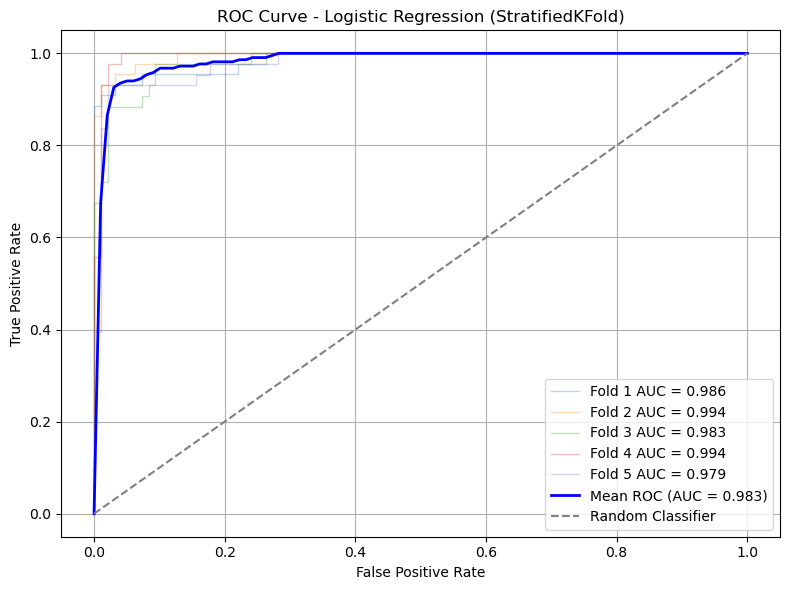


✅ 평균 AUC: 0.9826


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ▶️ Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ▶️ 저장 리스트 초기화
auc_list = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# ▶️ X: train_x_scaled, y: df_train_y["scale"]
X = train_x_scaled  # 스케일링된 입력 데이터
y = df_train_y["scale"].values  # 정답 라벨

plt.figure(figsize=(8, 6))

# ▶️ 교차검증 수행
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_val)[:, 1]  # 클래스 1의 확률

    # ROC, AUC 계산
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)

    # ROC 그리기용 데이터 저장
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {fold} AUC = {roc_auc:.3f}')

# ▶️ 평균 ROC 계산
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# ▶️ 평균 ROC Curve 그리기
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean ROC (AUC = {mean_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (StratifiedKFold)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ▶️ 최종 평균 AUC 출력
print(f"\n✅ 평균 AUC: {mean_auc:.4f}")
